# Motivation

<img src="https://images.unsplash.com/photo-1619083382085-9452906b7157?q=80&w=2064&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="Los Angeles skyline" width="1000"/>

Photo by [Lala Miklós](https://unsplash.com/@lalamiklos024) on [Unsplash](https://unsplash.com).
<br>

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where we can help!

I've created this notebook to identify patterns in criminal behavior in Los Angeles. 

## The Data

DataCamp published a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

# Task
-   Where is the majority of crimes happens?
-   which gender of victims is more common in each area?

-   What is the most frequent descent of victims?

-   What is the most frequent gender of the victims?

-   What is the most common age for victims of each gender?
    -   What is the number of crimes committed against victims of different age groups? (age group labels: "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+")
    
-   What is the most prevalent crime status?

-   Crime Incidents Over Time
-   Do crime incidents increase in certain months?
-   Do crime incidents increase on certain days?
-   Do crime incidents increase at certain hours?

-   Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# By default, pandas tries to infer the data type of each column, but here, 
# we explicitly tell pandas to treat the "TIME OCC" column as strings (i.e., str). 
# This is useful when you want to preserve the exact format of the time values, 
# which might not be the case if pandas tries to infer a different type, like integers.
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"DR_NO": str, "TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [24]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  object        
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 17.0+ MB


In [25]:
crimes.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

In [26]:
crimes.dropna(subset=["Vict Sex", "Vict Descent"], inplace=True)
crimes.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex             0
Vict Descent         0
Weapon Desc     112205
Status Desc          0
LOCATION             0
dtype: int64

In [27]:
crimes["Vict Sex"].value_counts()

Vict Sex
M    93008
F    89853
X     2812
H       30
Name: count, dtype: int64

In [28]:
# There is no standard meaning for `H` in the Victim's Sex column based on the provided descriptions. 
# It's possible that H could be a data entry error
crimes["Vict Sex"] = crimes["Vict Sex"].str.replace('H', 'X')
crimes["Vict Sex"].value_counts()

Vict Sex
M    93008
F    89853
X     2842
Name: count, dtype: int64

### Where is the majority of crimes happens?
### which gender of victims is more common in each area?

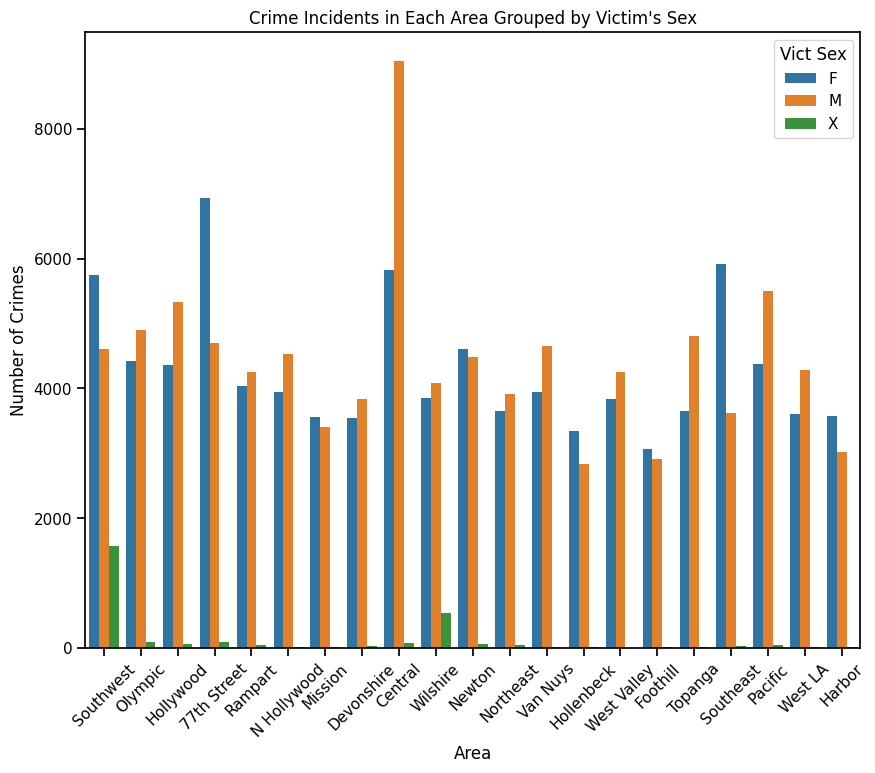

In [29]:
sns.set_context("notebook")

plt.figure(figsize=(10, 8))
sns.countplot(data=crimes, x="AREA NAME", hue="Vict Sex")
plt.xticks(rotation=45)
plt.title("Crime Incidents in Each Area Grouped by Victim's Sex")
plt.xlabel("Area")
plt.ylabel("Number of Crimes")
plt.show()

### What is the most frequent descent of victims?

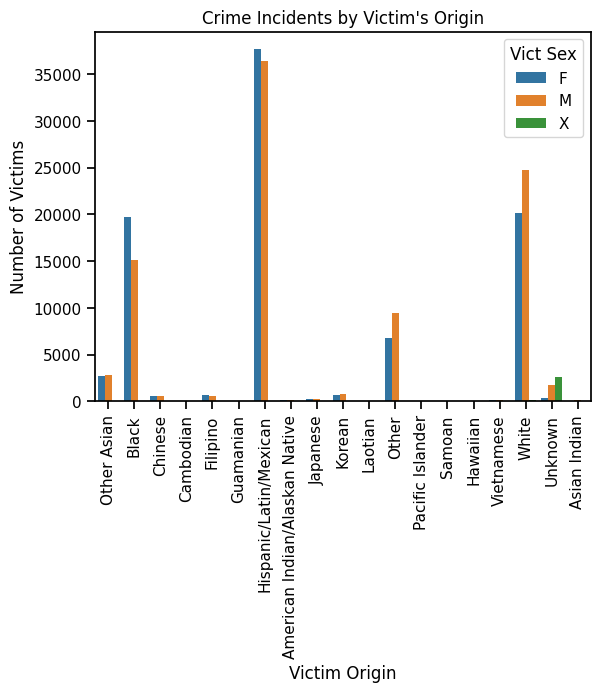

In [30]:
victim_descent = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

sns.countplot(data=crimes, x="Vict Descent", hue="Vict Sex", order=victim_descent.keys())
plt.xticks(ticks=range(len(victim_descent.keys())), labels=victim_descent.values(), rotation=90)
plt.title("Crime Incidents by Victim's Origin")
plt.xlabel("Victim Origin")
plt.ylabel("Number of Victims")
plt.show()

### What is the most frequent gender of the victims?

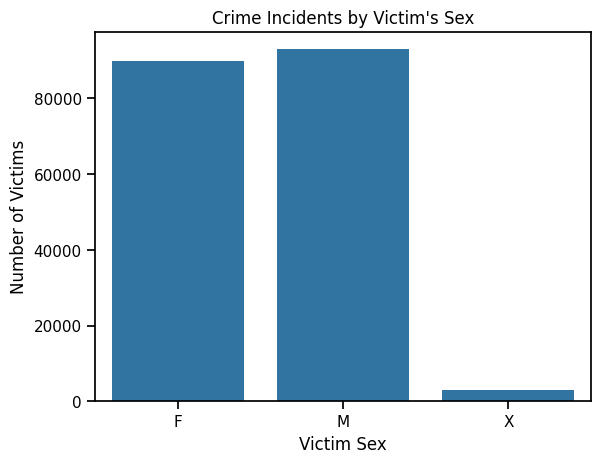

In [43]:
sns.countplot(data=crimes, x="Vict Sex")
plt.title("Crime Incidents by Victim's Sex")
plt.xlabel("Victim Sex")
plt.ylabel("Number of Victims")
plt.show()

### What is the most common age for victims of each gender?

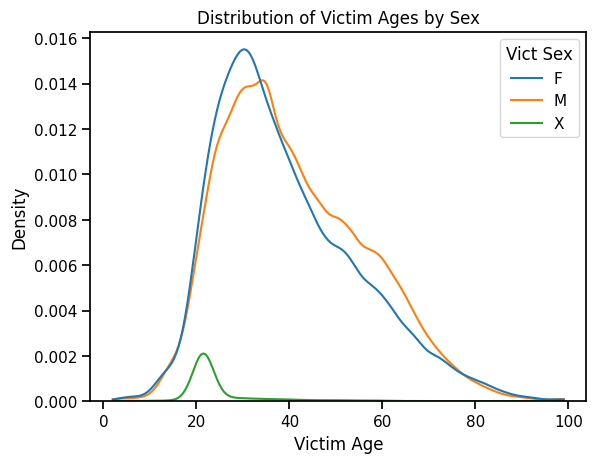

In [32]:
sns.kdeplot(data=crimes, x="Vict Age", hue="Vict Sex", cut=0)
plt.title("Distribution of Victim Ages by Sex")
plt.xlabel("Victim Age")
plt.ylabel("Density")
plt.show()

Vict Ages
26-34    47470
35-44    42155
45-54    28353
18-25    28283
55-64    20168
65+      14746
0-17      4528
Name: count, dtype: int64

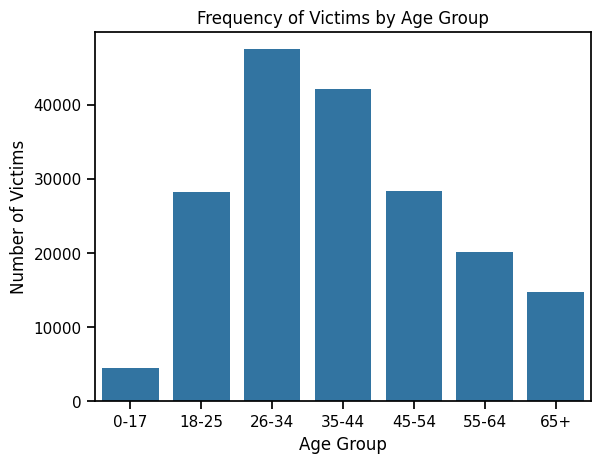

In [33]:
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
bins = [0, 17, 25, 34, 44, 54, 64, crimes["Vict Age"].max()] # `crimes["Vict Age"].max()` OR `np.inf`

crimes["Vict Ages"] = pd.cut(crimes["Vict Age"], labels=labels, bins=bins)
victim_ages = crimes["Vict Ages"].value_counts()

sns.countplot(data=crimes, x="Vict Ages")
plt.title("Frequency of Victims by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Victims")
victim_ages

### What is the most prevalent crime status?

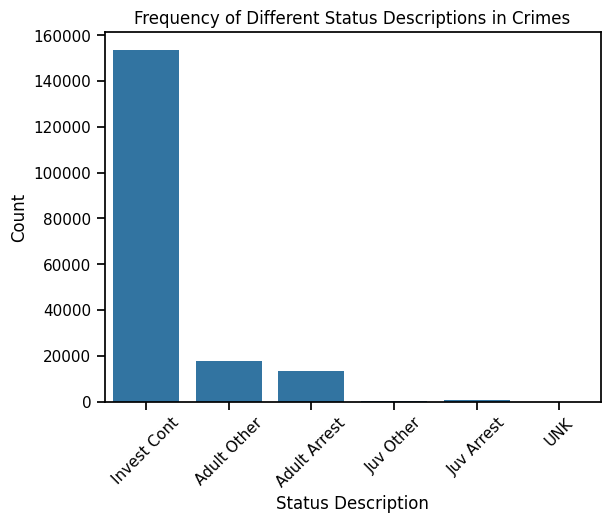

In [34]:
sns.countplot(data=crimes, x="Status Desc")
plt.xticks(rotation=45)
plt.title("Frequency of Different Status Descriptions in Crimes")
plt.xlabel("Status Description")
plt.ylabel("Count")
plt.show()

### Crime Incidents Over Time

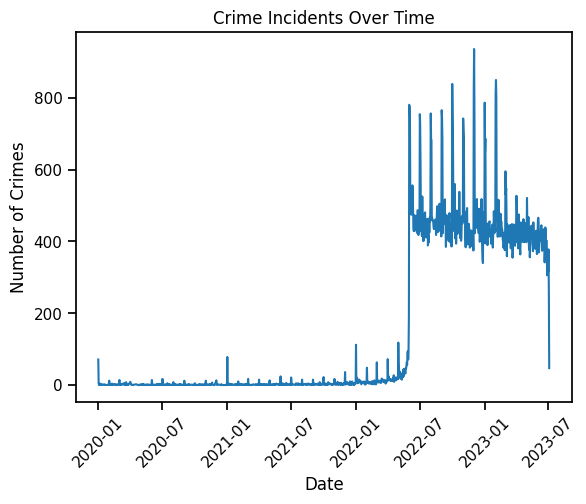

In [35]:
sns.lineplot(x=crimes["DATE OCC"].value_counts().index, y=crimes["DATE OCC"].value_counts().values)
plt.xticks(rotation=45)
plt.title("Crime Incidents Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.show()

# outputs the same plot as the code above ↑↑
# crimes["DATE OCC"].value_counts().sort_index().plot.line() 

### Do crime incidents increase in certain months?

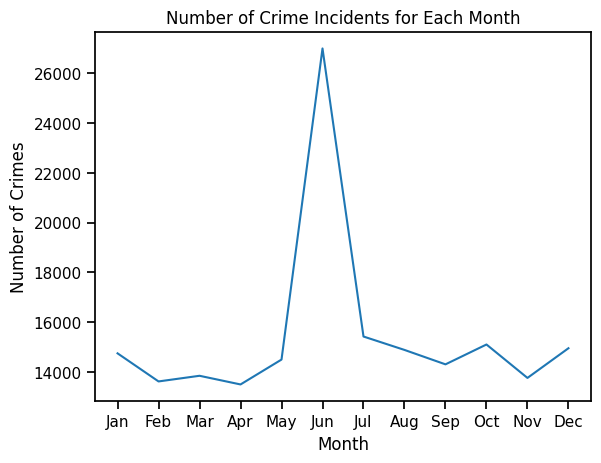

In [36]:
crimes["Month OCC"] = crimes["DATE OCC"].dt.month
month_crimesCount = crimes["Month OCC"].value_counts().sort_index()

sns.lineplot(x=month_crimesCount.index, y=month_crimesCount.values)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Number of Crime Incidents for Each Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()

### Do crime incidents increase on certain days?

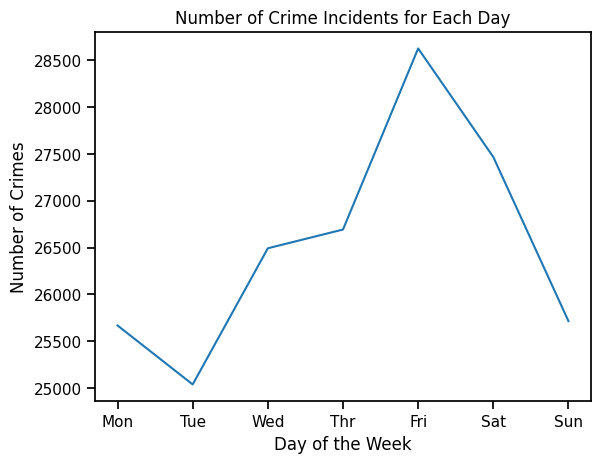

Weekday OCC
4    28625
5    27467
3    26693
2    26493
6    25716
0    25669
1    25040
Name: count, dtype: int64

In [37]:
crimes["Weekday OCC"] = crimes["DATE OCC"].dt.weekday
weekday_crimesCount = crimes["Weekday OCC"].value_counts()

sns.lineplot(x=weekday_crimesCount.index, y=weekday_crimesCount.values)
plt.xticks(ticks=range(0, 7), labels=["Mon", "Tue", "Wed", "Thr", "Fri", "Sat", "Sun"])
plt.title("Number of Crime Incidents for Each Day")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Crimes")
plt.show()
weekday_crimesCount

In [38]:
crimes["TIME OCC"] = pd.to_datetime(crimes["TIME OCC"], format="%H%M")
crimes["TIME OCC"]

0        1900-01-01 11:10:00
1        1900-01-01 16:20:00
2        1900-01-01 12:00:00
3        1900-01-01 06:35:00
4        1900-01-01 09:00:00
                 ...        
185710   1900-01-01 11:00:00
185711   1900-01-01 18:00:00
185712   1900-01-01 10:00:00
185713   1900-01-01 16:30:00
185714   1900-01-01 09:00:00
Name: TIME OCC, Length: 185703, dtype: datetime64[ns]

In [39]:
crimes["Hour OCC"] = crimes["TIME OCC"].dt.hour
crimes["Hour OCC"]

0         11
1         16
2         12
3          6
4          9
          ..
185710    11
185711    18
185712    10
185713    16
185714     9
Name: Hour OCC, Length: 185703, dtype: int32

### Do crime incidents increase at certain hours?

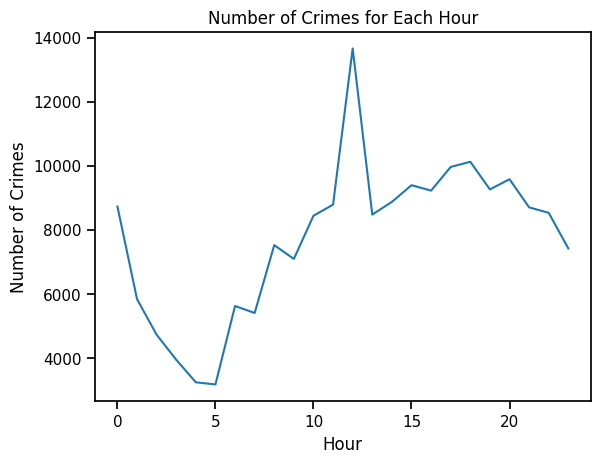

Hour OCC
12    13663
18    10125
17     9963
20     9579
15     9393
19     9261
16     9223
14     8872
11     8786
0      8728
21     8701
22     8530
13     8474
10     8439
8      7522
23     7418
9      7091
1      5836
6      5621
7      5403
2      4724
3      3942
4      3238
5      3171
Name: count, dtype: int64

In [40]:
hour_crimesCount = crimes["Hour OCC"].value_counts()

sns.lineplot(x=hour_crimesCount.index, y=hour_crimesCount.values)
plt.title("Number of Crimes for Each Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.show()
hour_crimesCount
# Midday has the largest volume of crime

### Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

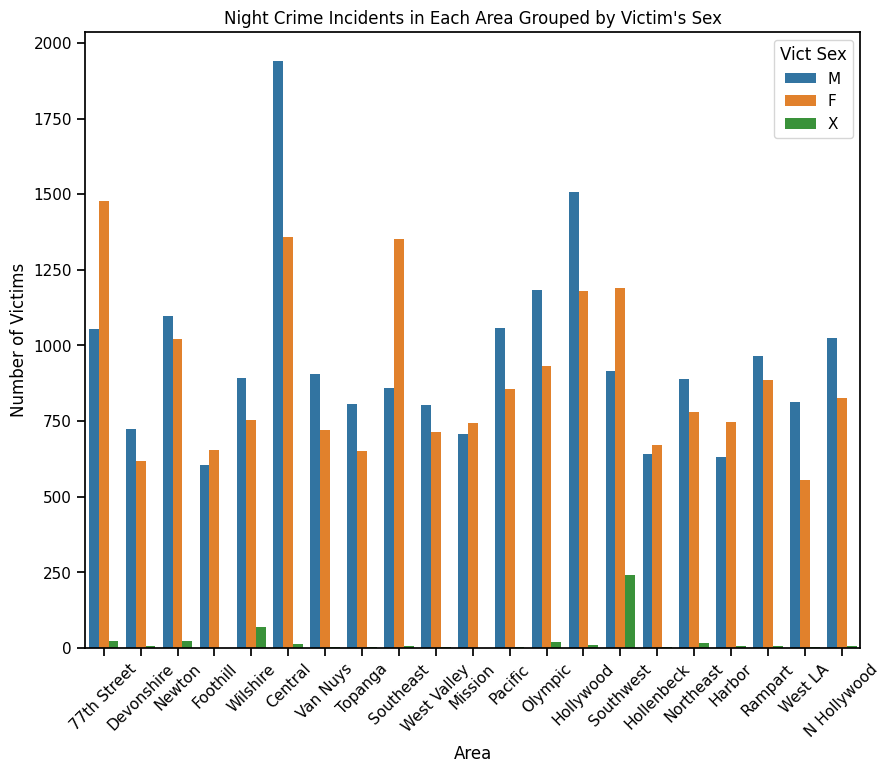

In [41]:
night_crimes = crimes[(crimes["Hour OCC"] >= 22) | (crimes["Hour OCC"] <= 3)]
plt.figure(figsize=(10, 8))
sns.countplot(data=night_crimes, x="AREA NAME", hue="Vict Sex")
plt.xticks(rotation=45)
plt.title("Night Crime Incidents in Each Area Grouped by Victim's Sex")
plt.xlabel("Area")
plt.ylabel("Number of Victims")
plt.show()

### Correlation Using Heatmap

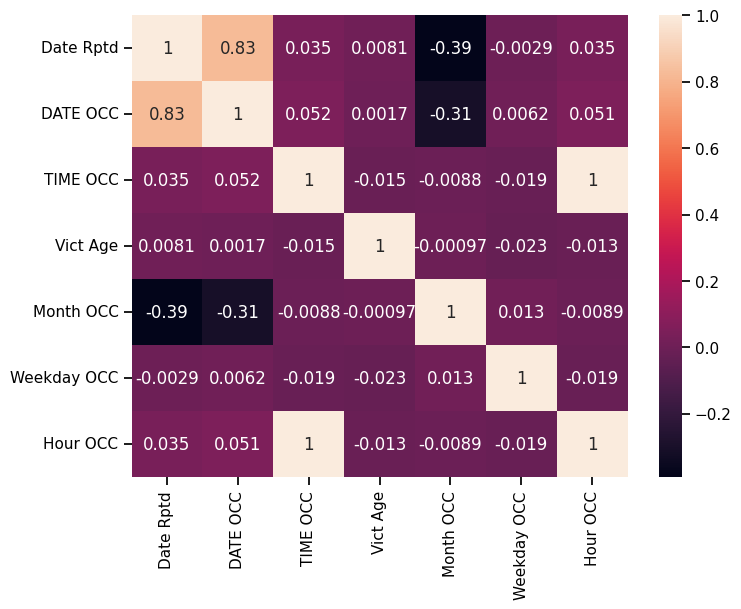

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(crimes.select_dtypes(exclude=["object", "category"]).corr(), annot=True)
plt.show()